In [562]:
import IPython, graphviz, re
import pydotplus
from io import StringIO
from IPython.display import Image  
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris

In [565]:
# decision tree on iris data

clf = tree.DecisionTreeClassifier()
iris = load_iris()

In [566]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [567]:
data = pd.DataFrame(iris.data)

In [589]:
data.columns = iris.feature_names

In [590]:
clf = clf.fit(data, iris.target)
s = tree.export_graphviz(clf,out_file=None,special_characters=True, 
                         rotate=True, precision=0, rounded=False)

In [591]:
s

'digraph Tree {\nnode [shape=box] ;\nrankdir=LR ;\n0 [label=<X<SUB>2</SUB> &le; 2.0<br/>gini = 1.0<br/>samples = 150<br/>value = [50, 50, 50]>] ;\n1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]>] ;\n0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;\n2 [label=<X<SUB>3</SUB> &le; 2.0<br/>gini = 0.0<br/>samples = 100<br/>value = [0, 50, 50]>] ;\n0 -> 2 [labeldistance=2.5, labelangle=45, headlabel="False"] ;\n3 [label=<X<SUB>2</SUB> &le; 5.0<br/>gini = 0.0<br/>samples = 54<br/>value = [0, 49, 5]>] ;\n2 -> 3 ;\n4 [label=<X<SUB>3</SUB> &le; 2.0<br/>gini = 0.0<br/>samples = 48<br/>value = [0, 47, 1]>] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 47<br/>value = [0, 47, 0]>] ;\n4 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 0, 1]>] ;\n4 -> 6 ;\n7 [label=<X<SUB>3</SUB> &le; 2.0<br/>gini = 0.0<br/>samples = 6<br/>value = [0, 2, 4]>] ;\n3 -> 7 ;\n8 [label=<gini = 0.0<br/>samples = 3<br/>value = [0, 0, 3]>] ;\n7 -> 8 ;\n9 [label=<X<SUB>2</SUB> &le; 5.0<

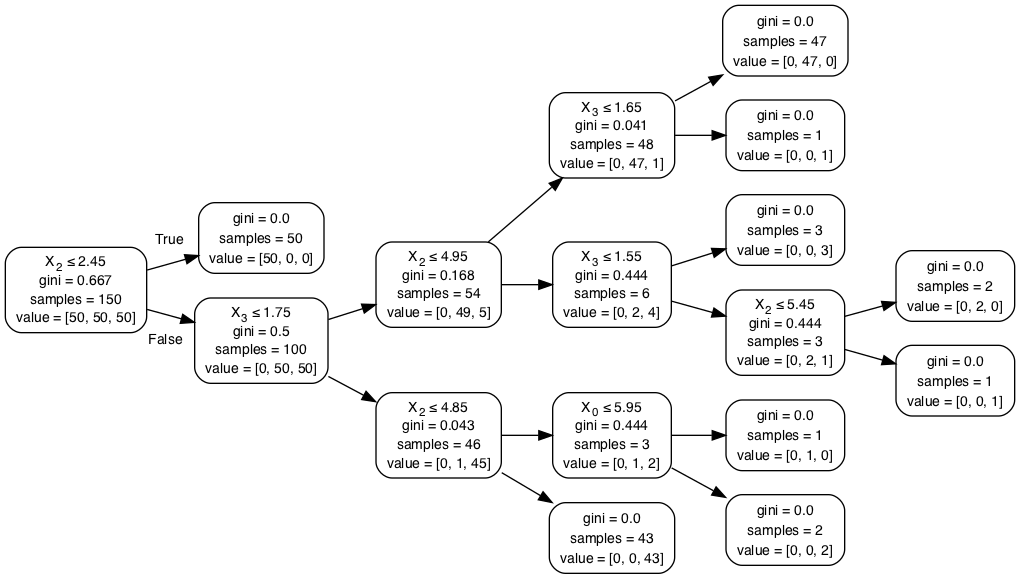

In [596]:
# visualizing sklearn's export graphviz

dot_data = StringIO()
tree.export_graphviz(clf, dot_data, special_characters=True, rotate=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Understanding Sklearn Decision Trees

In [597]:
# Using those arrays, we can parse the tree structure:

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [598]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth

In [599]:
while len(stack) > 0:
    node_id, parent_depth = stack.pop() # (0,-1)
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [616]:
tree_layout = []
var_names = list(np.zeros(n_nodes, dtype=str))

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
        tree_layout.append((i, children_left[i]))
        tree_layout.append((i, children_right[i]))
        var_names[i]=data.columns[feature[i]]
print()

The binary tree structure has 17 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 2] <= 2.450000047683716 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 3] <= 1.75 else to node 12.
		node=3 test node: go to node 4 if X[:, 2] <= 4.949999809265137 else to node 7.
			node=4 test node: go to node 5 if X[:, 3] <= 1.6500000953674316 else to node 6.
				node=5 leaf node.
				node=6 leaf node.
			node=7 test node: go to node 8 if X[:, 3] <= 1.5499999523162842 else to node 9.
				node=8 leaf node.
				node=9 test node: go to node 10 if X[:, 2] <= 5.449999809265137 else to node 11.
					node=10 leaf node.
					node=11 leaf node.
		node=12 test node: go to node 13 if X[:, 2] <= 4.850000381469727 else to node 16.
			node=13 test node: go to node 14 if X[:, 0] <= 5.949999809265137 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
			node=16 leaf node.



In [617]:
tree_layout

[(0, 1),
 (0, 2),
 (2, 3),
 (2, 12),
 (3, 4),
 (3, 7),
 (4, 5),
 (4, 6),
 (7, 8),
 (7, 9),
 (9, 10),
 (9, 11),
 (12, 13),
 (12, 16),
 (13, 14),
 (13, 15)]

In [618]:
var_names

['petal length (cm)',
 '',
 'petal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 '',
 '',
 'petal width (cm)',
 '',
 'petal length (cm)',
 '',
 '',
 'petal length (cm)',
 'sepal length (cm)',
 '',
 '',
 '']

### Visualizing decision tree for lolviz using graphviz

In [864]:
# fixed string arguments
st = '\ndigraph G {\n ranksep=equally;\n splines=line;\n nodesep=0.5;\n rankdir=TD;\n node [shape=plain width=1.5 height=0.5 fixedsize=False];\n        edge [arrowsize=0.5]\n'

In [865]:
# non leaf node feature names

for node_idx in range(n_nodes):
    if var_names[node_idx]!='': # non leaf nodes
        st += str(node_idx) + " [label=\"%s \"]" % (str(var_names[node_idx]))
        st+='\n '
st+= '\n'

In [866]:
st

'\ndigraph G {\n ranksep=equally;\n splines=line;\n nodesep=0.5;\n rankdir=TD;\n node [shape=plain width=1.5 height=0.5 fixedsize=False];\n        edge [arrowsize=0.5]\n0 [label="petal length (cm) "]\n 2 [label="petal width (cm) "]\n 3 [label="petal length (cm) "]\n 4 [label="petal width (cm) "]\n 7 [label="petal width (cm) "]\n 9 [label="petal length (cm) "]\n 12 [label="petal length (cm) "]\n 13 [label="sepal length (cm) "]\n \n'

In [867]:
## Get target values for leaf nodes

for i in range(n_nodes):
    if is_leaves[i]:
        value = clf.tree_.value[i][0]
        print(str(i) + " [shape=box label=\"value=%s \n samples=%s\"]" % (str(value), 
                                          int(sum(value))))
        st+= str(i) + " [shape=box label=\"value=%s \n samples=%s\"]" % (str(value), 
                                          int(sum(value)))

1 [shape=box label="value=[50.  0.  0.] 
 samples=50"]
5 [shape=box label="value=[ 0. 47.  0.] 
 samples=47"]
6 [shape=box label="value=[0. 0. 1.] 
 samples=1"]
8 [shape=box label="value=[0. 0. 3.] 
 samples=3"]
10 [shape=box label="value=[0. 2. 0.] 
 samples=2"]
11 [shape=box label="value=[0. 0. 1.] 
 samples=1"]
14 [shape=box label="value=[0. 1. 0.] 
 samples=1"]
15 [shape=box label="value=[0. 0. 2.] 
 samples=2"]
16 [shape=box label="value=[ 0.  0. 43.] 
 samples=43"]


In [868]:
# non leaf edges with > and <=

for i in range(n_nodes):
    if not is_leaves[i]:
        st+= str(i) + "->" + str(children_left[i]) + " [label=\"<%s\"]" % str(np.round(threshold[i],1))
        st+= str(i) + "->" + str(children_right[i]) + " [label=\">=%s\"]" % str(np.round(threshold[i],1))

In [869]:
# end of string

st = st+'}'

In [870]:
st

'\ndigraph G {\n ranksep=equally;\n splines=line;\n nodesep=0.5;\n rankdir=TD;\n node [shape=plain width=1.5 height=0.5 fixedsize=False];\n        edge [arrowsize=0.5]\n0 [label="petal length (cm) "]\n 2 [label="petal width (cm) "]\n 3 [label="petal length (cm) "]\n 4 [label="petal width (cm) "]\n 7 [label="petal width (cm) "]\n 9 [label="petal length (cm) "]\n 12 [label="petal length (cm) "]\n 13 [label="sepal length (cm) "]\n \n1 [shape=box label="value=[50.  0.  0.] \n samples=50"]5 [shape=box label="value=[ 0. 47.  0.] \n samples=47"]6 [shape=box label="value=[0. 0. 1.] \n samples=1"]8 [shape=box label="value=[0. 0. 3.] \n samples=3"]10 [shape=box label="value=[0. 2. 0.] \n samples=2"]11 [shape=box label="value=[0. 0. 1.] \n samples=1"]14 [shape=box label="value=[0. 1. 0.] \n samples=1"]15 [shape=box label="value=[0. 0. 2.] \n samples=2"]16 [shape=box label="value=[ 0.  0. 43.] \n samples=43"]0->1 [label="<2.5"]0->2 [label=">=2.5"]2->3 [label="<1.8"]2->12 [label=">=1.8"]3->4 [label

### Visualizing dot string

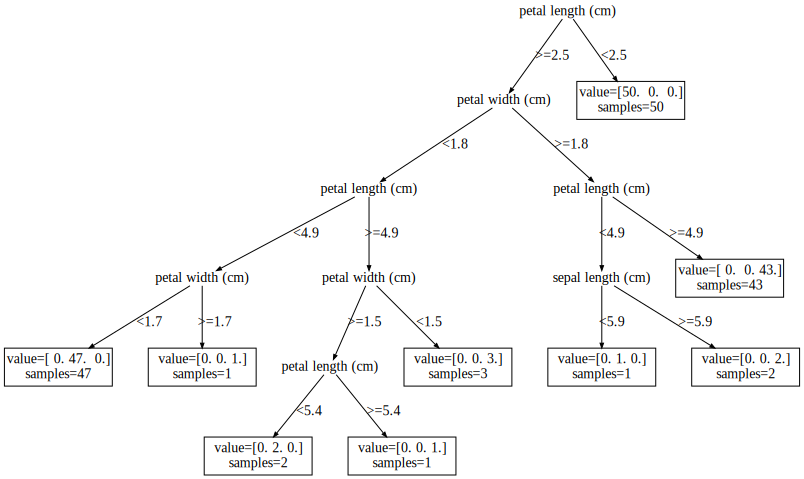

In [883]:
display(graphviz.Source(st))